## Exloratory Analysis
##### In this part, we'll go through the essential exploratory analysis steps:

1. Basic information  
2. Distributions of numeric features  
3. Distributions of categorical features  
4. Segmentations  
5. Correlations  
Along the way, we'll note the practical implications of our findings.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

In [50]:
df = pd.read_csv('data/dataset_regression_fulldata.csv')


##### 1. Basic Information

In [51]:
df.head()

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Surface of the plot,Living area,Terrace_Combined,garden_label,price/m2
0,9729720,APARTMENT,PENTHOUSE,179000,1140,4,1,1,1,3,1,0,63.0,1,0,2841.27
1,9729785,APARTMENT,PENTHOUSE,255000,8370,4,1,1,1,2,1,0,42.0,1,0,6071.43
2,9729784,APARTMENT,PENTHOUSE,255000,8370,4,1,1,1,2,1,0,42.0,1,0,6071.43
3,9729780,APARTMENT,PENTHOUSE,620000,8370,4,1,3,1,2,1,0,150.0,1,0,4133.33
4,9727201,APARTMENT,PENTHOUSE,379000,1020,4,2,2,1,3,0,0,120.0,1,0,3158.33


In [52]:
df.describe()

,Immoweb ID,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Surface of the plot,Living area,Terrace_Combined,garden_label,price/m2
count,1.221100e+04,1.221100e+04,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,9916.000000,12211.000000,12211.000000,9813.00000
mean,9.500595e+06,5.252729e+05,4775.634592,3.823192,0.802719,3.101548,0.665875,3.001392,0.713373,1601.748424,220.703913,0.581607,0.288674,2912.68492
std,3.476977e+05,5.793457e+05,3038.751881,1.661760,0.756936,2.793377,0.471703,0.782328,0.452204,12457.860556,296.073468,0.493316,0.453165,1796.66036
min,4.611027e+06,9.500000e+02,1000.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,7.86000
25%,9.471052e+06,2.350000e+05,1980.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,97.000000,0.000000,0.000000,1875.00000
50%,9.614689e+06,3.455000e+05,4000.000000,4.000000,1.000000,3.000000,1.000000,3.000000,1.000000,0.000000,155.000000,1.000000,0.000000,2586.96000
75%,9.686466e+06,5.900000e+05,8300.000000,6.000000,1.000000,4.000000,1.000000,4.000000,1.000000,736.000000,265.000000,1.000000,1.000000,3458.82000
max,9.731707e+06,9.500000e+06,9992.000000,6.000000,2.000000,204.000000,1.000000,16.000000,1.000000,580608.000000,11000.000000,1.000000,1.000000,29393.94000


##### 2. Detect missing values and fill in proper numeric values to missing value cells

In [53]:
df['Living area'].isnull().sum()    #isnull() detecting missing value

2295

In [54]:
def fill_living_area(col):  
    if col['Living area'] > 0:
        return col['Living area']
    else: 
        if col['Property type'] == 'APARTMENT':
            return 95.0
        else:
            return 150.0


df['Living area'] = df.apply(lambda col: fill_living_area(col), axis=1)

In [55]:
# Test if there are null values in living area
df['Living area'].isnull().sum()

0

In [56]:
df['price/m2'] = (df['Price']/ df['Living area']).round(2)

df

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Surface of the plot,Living area,Terrace_Combined,garden_label,price/m2
0,9729720,APARTMENT,PENTHOUSE,179000,1140,4,1,1,1,3,1,0,63.0,1,0,2841.27
1,9729785,APARTMENT,PENTHOUSE,255000,8370,4,1,1,1,2,1,0,42.0,1,0,6071.43
2,9729784,APARTMENT,PENTHOUSE,255000,8370,4,1,1,1,2,1,0,42.0,1,0,6071.43
3,9729780,APARTMENT,PENTHOUSE,620000,8370,4,1,3,1,2,1,0,150.0,1,0,4133.33
4,9727201,APARTMENT,PENTHOUSE,379000,1020,4,2,2,1,3,0,0,120.0,1,0,3158.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12206,7770552,APARTMENT,SERVICE_FLAT,132000,1730,6,0,1,0,3,1,0,50.0,0,0,2640.00
12207,7770553,APARTMENT,SERVICE_FLAT,177000,1730,6,0,1,0,3,1,0,64.0,1,0,2765.62
12208,7770551,APARTMENT,SERVICE_FLAT,190000,1730,6,0,2,0,3,1,0,70.0,1,0,2714.29
12209,7921693,APARTMENT,SERVICE_FLAT,1350000,5600,2,0,30,0,3,1,0,1500.0,0,0,900.00


In [57]:
# save dataframe 
df.to_csv('data/dataset_regression_final.csv', index=False)

# Data Exploration

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

Eliza_df = pd.read_csv('data/dataset_regression_final.csv')
Eliza_df.shape


(12211, 16)

In [59]:
Eliza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12211 entries, 0 to 12210
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Immoweb ID           12211 non-null  int64  
 1   Property type        12211 non-null  object 
 2   property sub-type    12211 non-null  object 
 3   Price                12211 non-null  int64  
 4   Post code            12211 non-null  int64  
 5   Building condition   12211 non-null  int64  
 6   Kitchen type         12211 non-null  int64  
 7   Bedrooms             12211 non-null  int64  
 8   Furnished            12211 non-null  int64  
 9   Number of frontages  12211 non-null  int64  
 10  Swimming pool        12211 non-null  int64  
 11  Surface of the plot  12211 non-null  int64  
 12  Living area          12211 non-null  float64
 13  Terrace_Combined     12211 non-null  int64  
 14  garden_label         12211 non-null  int64  
 15  price/m2             12211 non-null 

In [60]:
Eliza_df.describe()

,Immoweb ID,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Surface of the plot,Living area,Terrace_Combined,garden_label,price/m2
count,1.221100e+04,1.221100e+04,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000,12211.000000
mean,9.500595e+06,5.252729e+05,4775.634592,3.823192,0.802719,3.101548,0.665875,3.001392,0.713373,1601.748424,201.852838,0.581607,0.288674,3007.028492
std,3.476977e+05,5.793457e+05,3038.751881,1.661760,0.756936,2.793377,0.471703,0.782328,0.452204,12457.860556,269.925581,0.493316,0.453165,2181.849294
min,4.611027e+06,9.500000e+02,1000.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,7.860000
25%,9.471052e+06,2.350000e+05,1980.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,95.000000,0.000000,0.000000,1877.430000
50%,9.614689e+06,3.455000e+05,4000.000000,4.000000,1.000000,3.000000,1.000000,3.000000,1.000000,0.000000,150.000000,1.000000,0.000000,2583.330000
75%,9.686466e+06,5.900000e+05,8300.000000,6.000000,1.000000,4.000000,1.000000,4.000000,1.000000,736.000000,230.000000,1.000000,1.000000,3468.655000
max,9.731707e+06,9.500000e+06,9992.000000,6.000000,2.000000,204.000000,1.000000,16.000000,1.000000,580608.000000,11000.000000,1.000000,1.000000,40566.670000


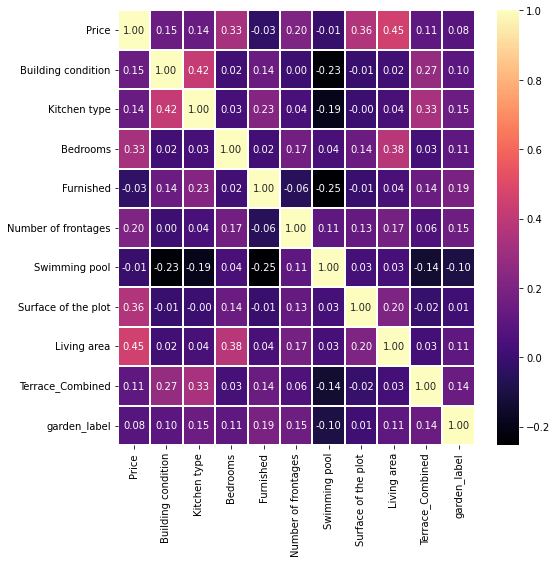

In [61]:
Newdf = Eliza_df.drop(columns=['Post code', 'Immoweb ID','price/m2','Property type','property sub-type'] )
# sns.heatmap(Newdf.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")

fig,ax = plt.subplots(figsize=(8, 8))   
headmap_plot = sns.heatmap(Newdf.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")  


figure = headmap_plot.get_figure()    
figure.savefig('Heatmap.png', dpi=100)

##### Identify outliers

In [62]:
# define a function 
import warnings
warnings.filterwarnings('ignore') 
# functions to create diagnostic plots
def plotvariable(Newdf, variable):
    plt.figure(figsize=(16,4))
    #histogram
    plt.subplot(1,2,1)
    plt.hist(Newdf[variable], alpha=0.5)

    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(Newdf[variable])
    plt.show()

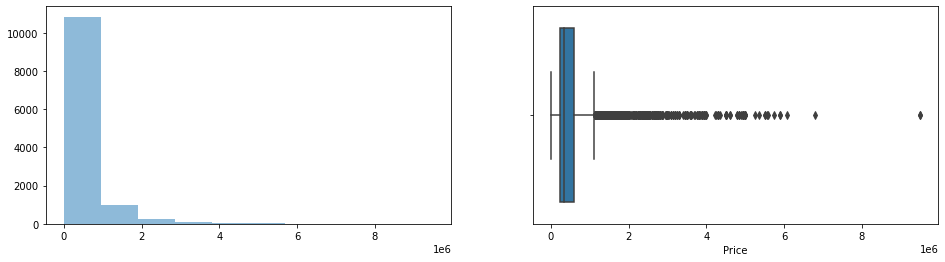

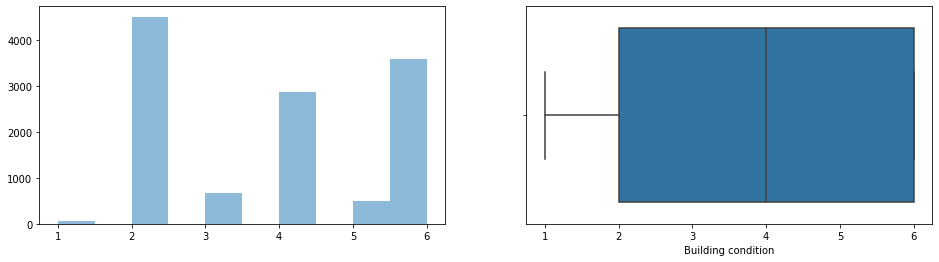

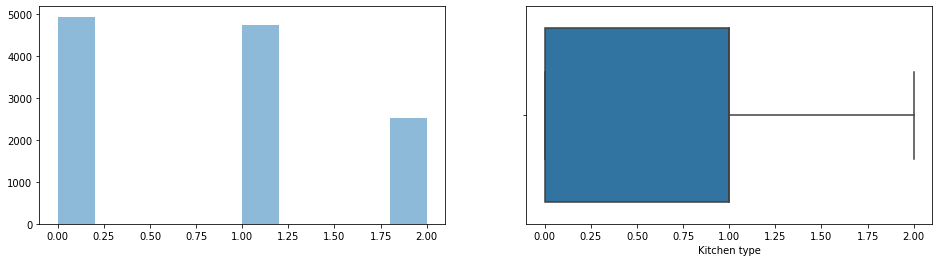

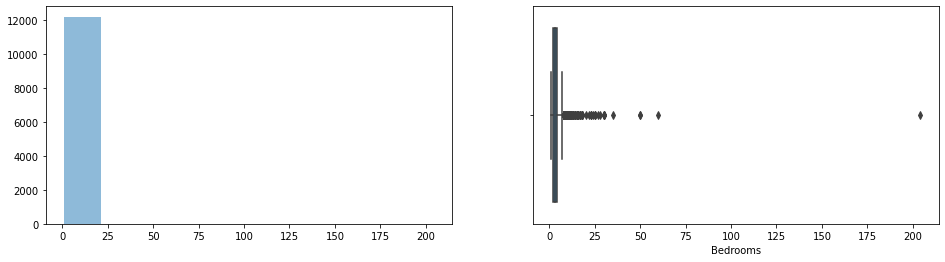

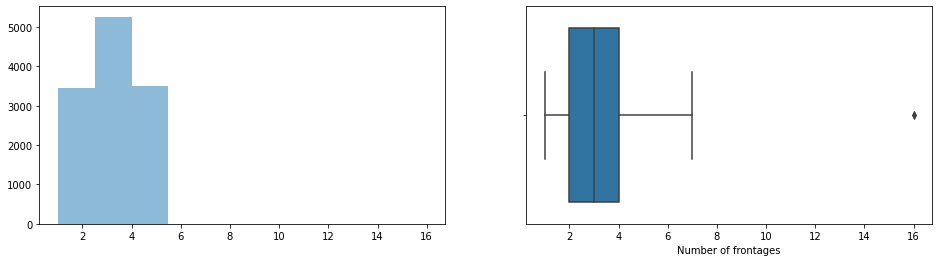

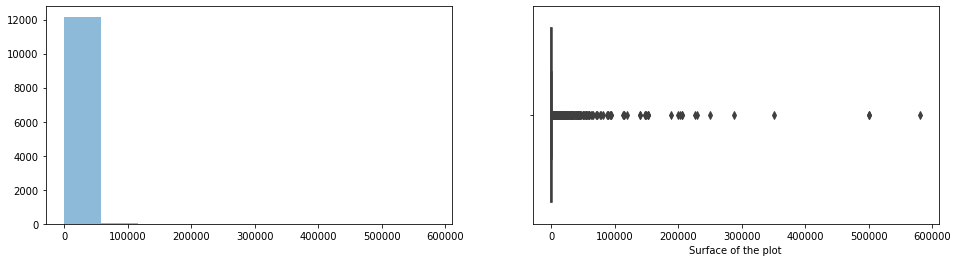

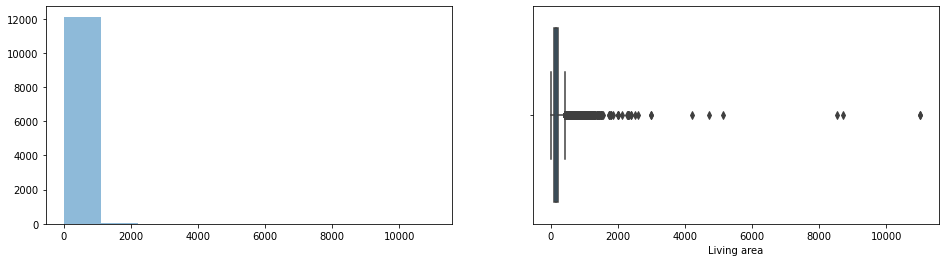

In [63]:
plotvariable(Newdf, "Price")
plotvariable(Newdf, "Building condition")
plotvariable(Newdf, "Kitchen type")
plotvariable(Newdf, "Bedrooms")
# plotvariable(Newdf, "Furnished")
plotvariable(Newdf, "Number of frontages")
# plotvariable(Newdf, "Swimming pool")
plotvariable(Newdf, "Surface of the plot")
plotvariable(Newdf, "Living area")
# plotvariable(Newdf, "Terrace_Combined")
# plotvariable(Newdf, "garden_label")


##### Remove outliers

In [64]:
# define a function called "outliers" which returns a list of index of outliers
# Use Inter-quartile Range(IQR) to detect ourliers
# IQR = Q3-Q1
# +/- 1.5*IQR

def outliers(Newdf, variable):
    Q1 = Newdf[variable].quantile(0.25)
    Q3 = Newdf[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    ls = Newdf.index[(Newdf[variable] < lower_bound) | (Newdf[variable] > upper_bound)]
    return ls 

In [65]:
# create an empty list to store the output indice from multiple columns
index_list = []
for variable in ['Price','Building condition','Bedrooms', 'Kitchen type','Bedrooms','Furnished','Number of frontages','Swimming pool','Surface of the plot',
                'Living area', 'Terrace_Combined', 'garden_label']:
    index_list.extend(outliers(Newdf, variable))



In [66]:
index_list

[6,
 7,
 26,
 27,
 28,
 29,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 97,
 98,
 99,
 105,
 106,
 107,
 116,
 117,
 118,
 119,
 120,
 124,
 135,
 136,
 137,
 144,
 145,
 151,
 155,
 164,
 165,
 169,
 187,
 190,
 218,
 223,
 225,
 241,
 242,
 244,
 247,
 248,
 254,
 255,
 256,
 257,
 258,
 281,
 282,
 283,
 284,
 285,
 286,
 294,
 295,
 300,
 301,
 317,
 319,
 320,
 326,
 329,
 341,
 350,
 365,
 370,
 371,
 390,
 391,
 392,
 393,
 449,
 450,
 453,
 464,
 465,
 470,
 481,
 492,
 504,
 505,
 506,
 507,
 532,
 533,
 537,
 581,
 614,
 623,
 628,
 629,
 635,
 712,
 713,
 750,
 762,
 773,
 789,
 790,
 813,
 843,
 888,
 904,
 905,
 906,
 928,
 932,
 969,
 981,
 1008,
 1045,
 1046,
 1049,
 1064,
 1065,
 1076,
 1114,
 1115,
 1137,
 1146,
 1162,
 1163,
 1164,
 1169,
 1170,
 1254,
 1255,
 1256,
 1257,
 1290,
 1291,
 1292,
 1302,
 1336,
 1337,
 1341,
 1346,
 1363,
 1399,
 1458,
 1480,
 1512,
 1518,
 1604,
 1628,
 1721,
 1743,
 1768,
 2627,
 2782,
 2800,
 2818,
 2819,
 2830,
 2842,
 2843,
 2844,
 2849

In [67]:
# define a function called "remove" which returns a cleaned dataframe without outliers
def remove(Newdf, ls):
    ls = sorted(set(ls)) 
    Newdf = Newdf.drop(ls)
    return Newdf

In [68]:
df_cleaned = remove(Newdf, index_list)
df_cleaned


,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Surface of the plot,Living area,Terrace_Combined,garden_label
0,179000,4,1,1,1,3,1,0,63.0,1,0
1,255000,4,1,1,1,2,1,0,42.0,1,0
2,255000,4,1,1,1,2,1,0,42.0,1,0
3,620000,4,1,3,1,2,1,0,150.0,1,0
4,379000,4,2,2,1,3,0,0,120.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
12204,250200,2,0,1,0,3,1,0,50.0,0,0
12205,204760,2,0,1,0,3,1,0,50.0,0,0
12206,132000,6,0,1,0,3,1,0,50.0,0,0
12207,177000,6,0,1,0,3,1,0,64.0,1,0


In [69]:
# save dataframe 
df.to_csv('data/dataset_regression_cleaned.csv', index=False)

In [70]:
df_cleaned.shape

(9804, 11)

### The result after removing outliers

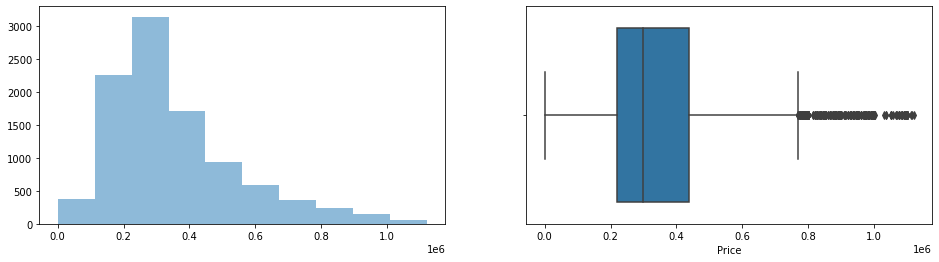

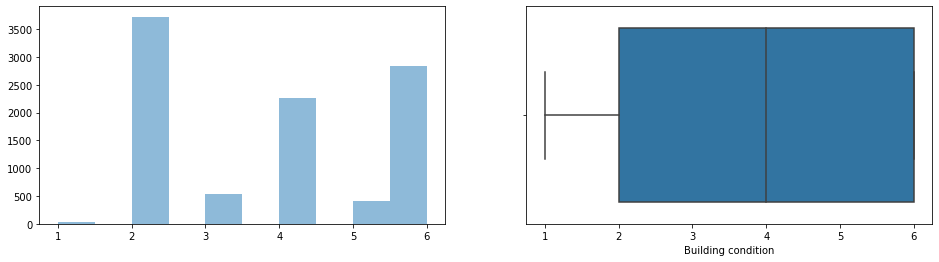

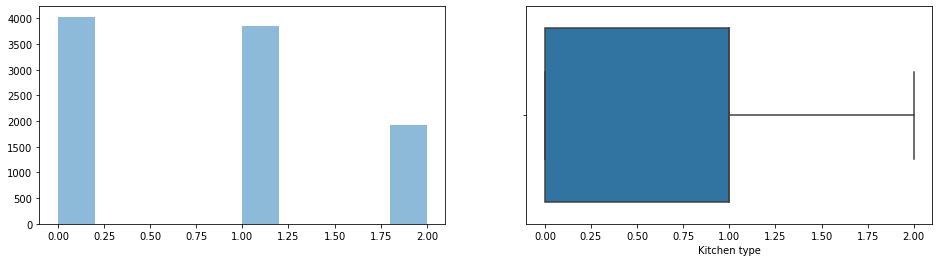

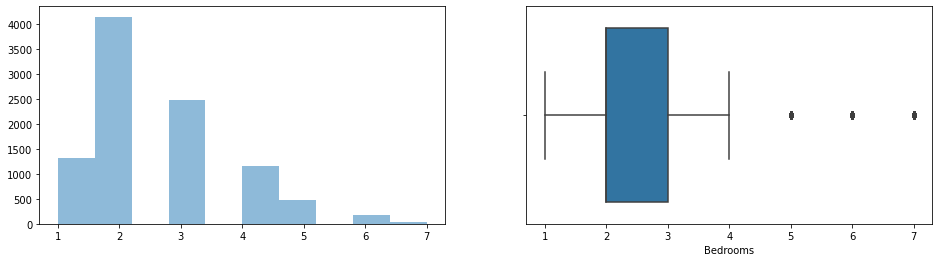

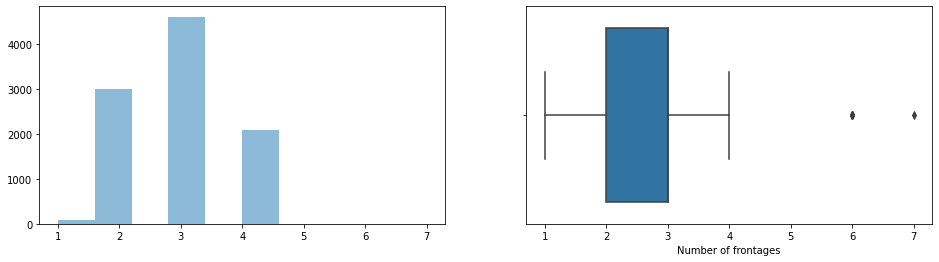

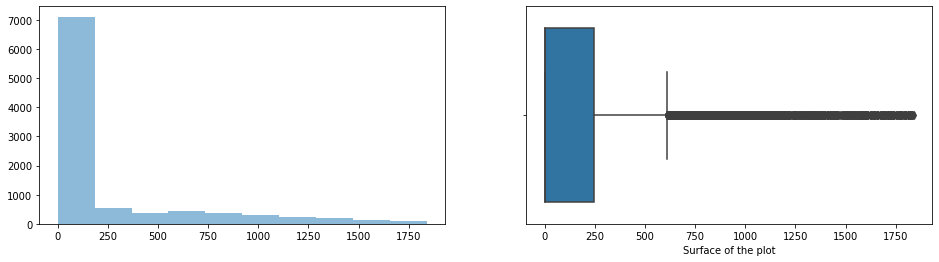

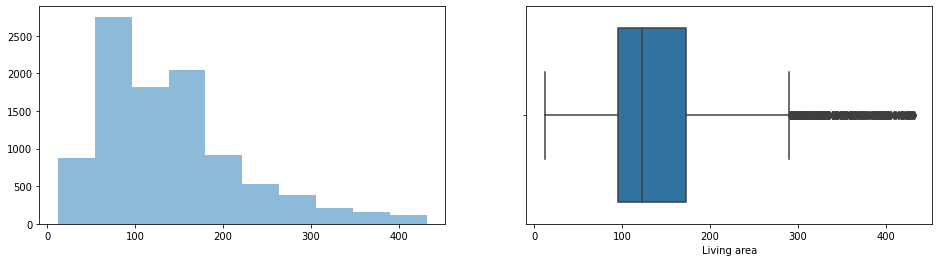

In [98]:
plotvariable(df_cleaned, "Price")
plotvariable(df_cleaned, "Building condition")
plotvariable(df_cleaned, "Kitchen type")
plotvariable(df_cleaned, "Bedrooms")
# plotvariable(df_cleaned, "Furnished")
plotvariable(df_cleaned, "Number of frontages")
# plotvariable(df_cleaned, "Swimming pool")
plotvariable(df_cleaned, "Surface of the plot")
plotvariable(df_cleaned, "Living area")
# plotvariable(df_cleaned, "Terrace_Combined")
# plotvariable(df_cleaned, "garden_label")

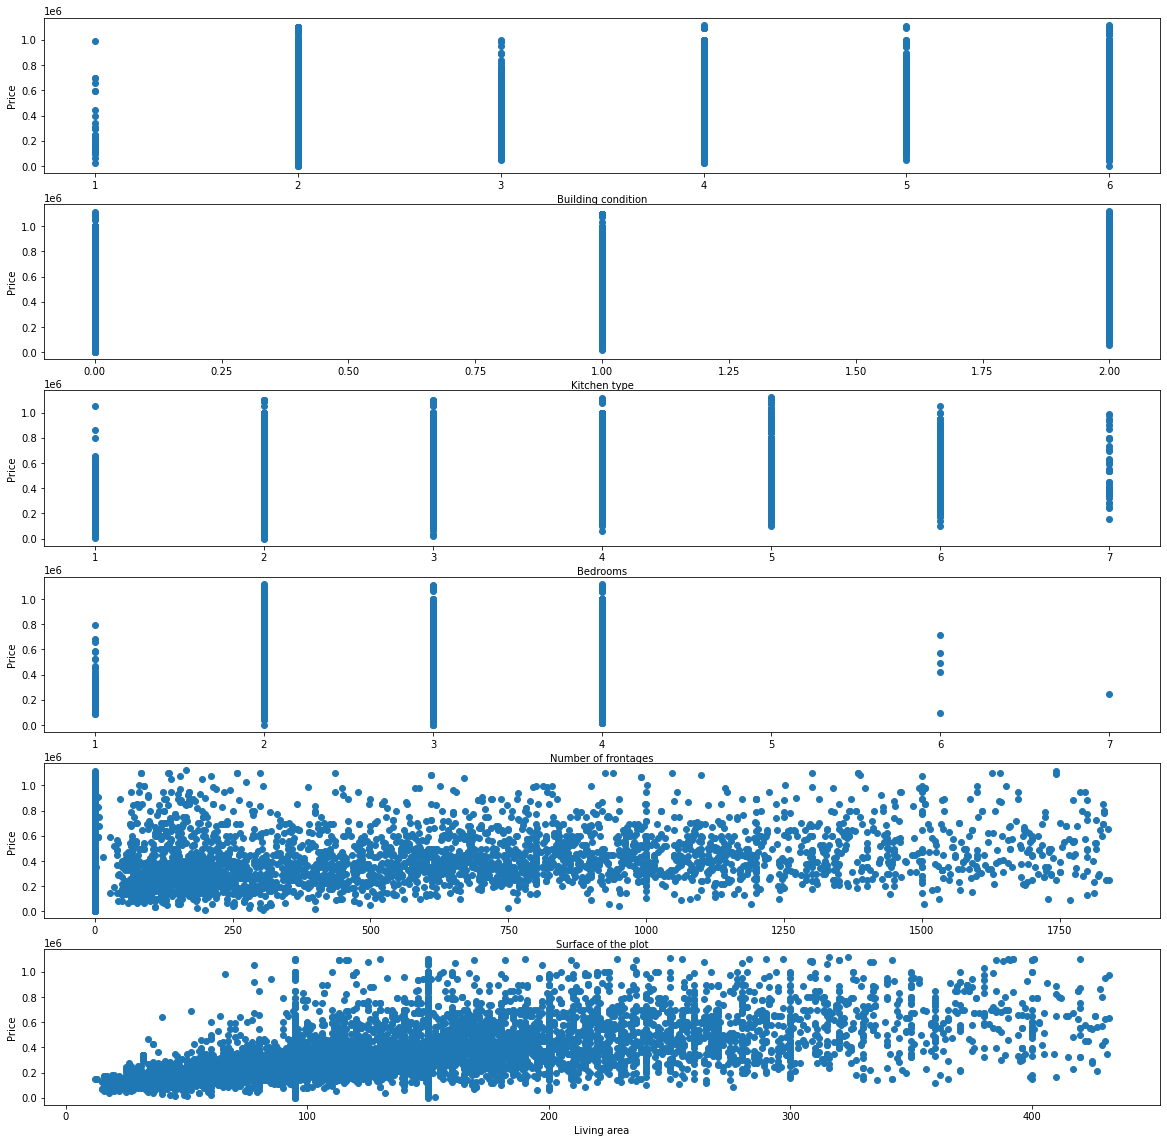

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(6, figsize=(20, 20))
ax[0].scatter(x = df_cleaned['Building condition'], y = df_cleaned['Price'])
ax[0].set_xlabel("Building condition")
ax[0].set_ylabel("Price")

ax[1].scatter(x = df_cleaned['Kitchen type'], y = df_cleaned['Price'])
ax[1].set_xlabel("Kitchen type")
ax[1].set_ylabel("Price")

ax[2].scatter(x = df_cleaned['Bedrooms'], y = df_cleaned['Price'])
ax[2].set_xlabel("Bedrooms")
ax[2].set_ylabel("Price")

ax[3].scatter(x = df_cleaned['Number of frontages'], y = df_cleaned['Price'])
ax[3].set_xlabel("Number of frontages")
ax[3].set_ylabel("Price")

ax[4].scatter(x = df_cleaned['Surface of the plot'], y = df_cleaned['Price'])
ax[4].set_xlabel("Surface of the plot")
ax[4].set_ylabel("Price")

ax[5].scatter(x = df_cleaned['Living area'], y = df_cleaned['Price'])
ax[5].set_xlabel("Living area")
ax[5].set_ylabel("Price")

plt.show()

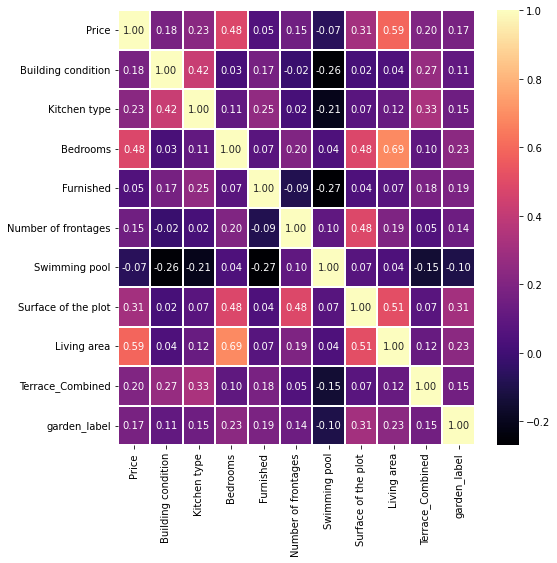

In [73]:
# the correlation after removing outliers

fig,ax = plt.subplots(figsize=(8, 8))   
headmap_plot = sns.heatmap(df_cleaned.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")  


figure = headmap_plot.get_figure()    
figure.savefig('Heatmap.png', dpi=100)


## Model Learning - Simple Linear Regression sklearn  
##### Split the dataset  

In [74]:
from sklearn.model_selection import train_test_split
import numpy as np
X = df_cleaned['Living area'].to_numpy().reshape(-1,1)
y = df_cleaned['Price'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# print mean values
print(np.mean(X_train))
print(np.mean(X_test))
print(np.mean(y_train))
print(np.mean(y_test))

(7843, 1)
(1961, 1)
(7843,)
(1961,)
140.22950401632028
142.85823559408465
348947.0594160398
354756.8526262111


### Load and fit the model -- Simple Linear Regression sklearn

In [75]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)   # retrieve intercept
print(regressor.coef_)  # retrive slope

139242.99547658686
[1495.43468338]


In [76]:
# display the score of my train model
regressor.score(X_train, y_train)

0.3568168138518283

### Test the model

In [77]:
# predicting the test set result
y_pred = regressor.predict(X_test)
print(y_pred)
print(y_test)

[363558.19798388 303740.8106486  287291.0291314  ... 423375.58531916
 378512.5448177  363558.19798388]
[250000 210000 278000 ... 534000 290000 425000]


In [78]:
# display the score of my test model
regressor.score(X_test, y_test)

0.31006281925181267

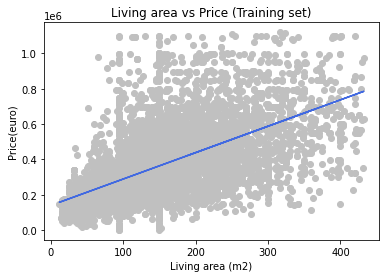

In [80]:
# Visualising the Training set results 
plt.scatter(X_train, y_train, color = 'silver') 
plt.plot(X_train, regressor.predict(X_train), color = 'royalblue') 
plt.title('Living area vs Price (Training set)') 
plt.xlabel('Living area (m2)') 
plt.ylabel('Price(euro)') 
plt.show()

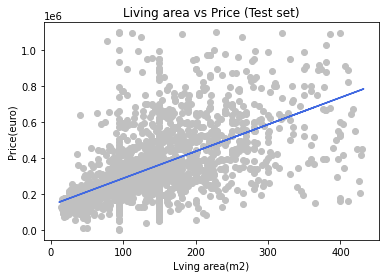

In [81]:
# Visualising the Test set results 
plt.scatter(X_test, y_test, color = 'silver') 
plt.plot(X_train, regressor.predict(X_train), color = 'royalblue') 
plt.title('Living area vs Price (Test set)') 
plt.xlabel('Lving area(m2)') 
plt.ylabel('Price(euro)') 
plt.show()

### Multiple Linear Regression

In [82]:
X1 = df_cleaned.drop(['Price'], axis =1)
X1.info()
y1 = df_cleaned['Price']
print("Shape of X1: ", X1.shape)
print("Shape of y1: ", y1.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9804 entries, 0 to 12208
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building condition   9804 non-null   int64  
 1   Kitchen type         9804 non-null   int64  
 2   Bedrooms             9804 non-null   int64  
 3   Furnished            9804 non-null   int64  
 4   Number of frontages  9804 non-null   int64  
 5   Swimming pool        9804 non-null   int64  
 6   Surface of the plot  9804 non-null   int64  
 7   Living area          9804 non-null   float64
 8   Terrace_Combined     9804 non-null   int64  
 9   garden_label         9804 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 842.5 KB
Shape of X1:  (9804, 10)
Shape of y1:  (9804,)


In [83]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=365)

In [84]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(X1_train)

StandardScaler()

In [85]:
features_scal = scaler.transform(X1_train)

In [86]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X1_train, y1_train)
regressor.score(X1_train, y1_train)

0.399495490321107

In [87]:
y1_hat = regressor.predict(X1_train)

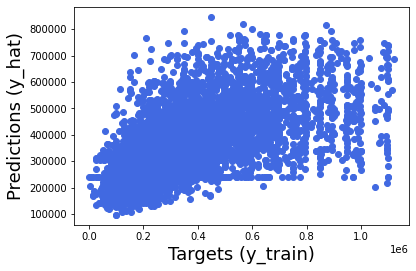

In [96]:
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y1_train, y1_hat, color='royalblue')
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

In [89]:
scaler.transform(X1_test)

array([[-1.08360631, -1.05340473,  0.35038375, ...,  0.07394353,
        -1.1650661 ,  1.66835419],
       [ 0.12069074,  0.27979735,  1.21564187, ...,  1.75944462,
         0.8583204 , -0.59939311],
       [-1.08360631,  1.61299944, -0.51487436, ..., -0.38228233,
        -1.1650661 , -0.59939311],
       ...,
       [-1.08360631, -1.05340473, -1.38013248, ..., -1.01592936,
         0.8583204 , -0.59939311],
       [ 0.72283927,  1.61299944, -0.51487436, ..., -1.18067758,
        -1.1650661 , -0.59939311],
       [ 0.12069074,  1.61299944, -0.51487436, ...,  0.88501173,
        -1.1650661 , -0.59939311]])

In [90]:
regressor.score(X1_test, y1_test)

0.41239595004450724

In [91]:
regressor.coef_

array([ 1.11908724e+04,  2.43595295e+04,  2.65893774e+04, -2.16100836e+04,
        1.26542688e+04, -2.25414477e+04, -2.01269637e+01,  1.18906579e+03,
        2.68784113e+04, -7.86459806e+02])

In [92]:
reg_summary = pd.DataFrame(X1.columns.values, columns=['Features'])
reg_summary['Weights'] = regressor.coef_
reg_summary

,Features,Weights
0,Building condition,11190.872398
1,Kitchen type,24359.529511
2,Bedrooms,26589.377381
3,Furnished,-21610.083645
4,Number of frontages,12654.268812
5,Swimming pool,-22541.447682
6,Surface of the plot,-20.126964
7,Living area,1189.065786
8,Terrace_Combined,26878.411333
9,garden_label,-786.459806


In [93]:
y_hat_test = regressor.predict(X1_test)

In [94]:
y_hat_test = regressor.predict(X1_test)

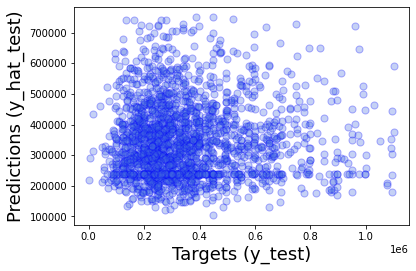

In [95]:
plt.scatter(y_test, y_hat_test, alpha=0.3, color = 'royalblue', edgecolor = 'b', s = 50)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

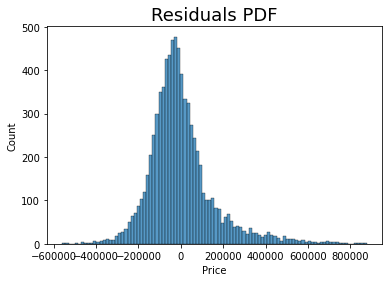

In [101]:
# We can plot the PDF(Probability density function) of the residuals and check for anomalies
sns.histplot(y1_train - y1_hat)
plt.title("Residuals PDF", size=18)

In [104]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

y_hat = regressor.predict(X1_train)
rmse = np.sqrt(MSE(y1_train, y1_hat))
r2 = r2_score(y1_train, y1_hat)

print("The model performance for training set")
print("--------------------------------------")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = regressor.predict(X1_test)
rmse = np.sqrt(MSE(y1_test, y_test_predict))
r2 = r2_score(y1_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))

The model performance for training set
--------------------------------------
RMSE is 153033.16519409767
R2 score is 0.399495490321107


The model performance for testing set
--------------------------------------
RMSE is 148079.93776431904
R2 score is 0.41239595004450724
